In [72]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print("Done Import")

Done Import


In [3]:
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', None)

gmob = pd.read_excel("google-mobility-index.xlsx")
gmob

,Value,Date,Sub-Sector,Super Region,Frequency,Country Region,Sub Region 1,Unit,Source,Indicator,Sub Region 2
0,-27,2021-01-24,GOOGLE MOBILITY INDEX,GLOBAL DATA,DAILY,NORWAY,VESTFOLD OG TELEMARK,INDEX,GOOGLE LLC,PARKS PERCENT CHANGE FROM BASELINE,NaN
1,293,2020-08-07,GOOGLE MOBILITY INDEX,GLOBAL DATA,DAILY,NORWAY,VESTFOLD OG TELEMARK,INDEX,GOOGLE LLC,PARKS PERCENT CHANGE FROM BASELINE,NaN
...,...,...,...,...,...,...,...,...,...,...,...
32029,-16,2020-03-19,GOOGLE MOBILITY INDEX,GLOBAL DATA,DAILY,UNITED STATES,FLORIDA,INDEX,GOOGLE LLC,WORKPLACES PERCENT CHANGE FROM BASELINE,BAY COUNTY
32030,-14,2020-03-18,GOOGLE MOBILITY INDEX,GLOBAL DATA,DAILY,UNITED STATES,FLORIDA,INDEX,GOOGLE LLC,WORKPLACES PERCENT CHANGE FROM BASELINE,BAY COUNTY


In [4]:
pd.set_option('display.max_rows', None)
print(gmob.info(verbose=True),'\n','-'*80,'\n','-'*80)
gmob_desc = pd.DataFrame()
gmob_desc['isna'] = gmob.isna().sum()
gmob_desc['nunique'] = gmob.nunique()
print(gmob_desc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32031 entries, 0 to 32030
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Value           32031 non-null  int64 
 1   Date            32031 non-null  object
 2   Sub-Sector      32031 non-null  object
 3   Super Region    32031 non-null  object
 4   Frequency       32031 non-null  object
 5   Country Region  32031 non-null  object
 6   Sub Region 1    32031 non-null  object
 7   Unit            32031 non-null  object
 8   Source          32031 non-null  object
 9   Indicator       32031 non-null  object
 10  Sub Region 2    23148 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB
None 
 -------------------------------------------------------------------------------- 
 --------------------------------------------------------------------------------
                isna  nunique
Value              0      321
Date               0      373
Sub-Sec

In [5]:
pd.set_option('display.max_rows', 5)
gmob = gmob.drop(['Sub-Sector', 'Super Region', 'Frequency', 'Unit', 'Source'], axis=1)

gmob['Date'] = pd.to_datetime(gmob['Date'])
gmob

,Value,Date,Country Region,Sub Region 1,Indicator,Sub Region 2
0,-27,2021-01-24,NORWAY,VESTFOLD OG TELEMARK,PARKS PERCENT CHANGE FROM BASELINE,NaN
1,293,2020-08-07,NORWAY,VESTFOLD OG TELEMARK,PARKS PERCENT CHANGE FROM BASELINE,NaN
...,...,...,...,...,...,...
32029,-16,2020-03-19,UNITED STATES,FLORIDA,WORKPLACES PERCENT CHANGE FROM BASELINE,BAY COUNTY
32030,-14,2020-03-18,UNITED STATES,FLORIDA,WORKPLACES PERCENT CHANGE FROM BASELINE,BAY COUNTY


In [101]:
def vertical_labelvalue(graph, data, rotationticklabels=0):
    for p in graph.patches:
        graph.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', 
                       va = 'center', xytext = (0, 5), textcoords = 'offset points')
        graph.annotate(('{:.2f}%'.format(p.get_height()/(data.value_counts().sum())*100)), 
                       (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center',
                       va = 'center', xytext = (0, 20), textcoords = 'offset points')
        graph.set_xticklabels(graph.get_xticklabels(), rotation=rotationticklabels)

#total = len(data)
def horizontal_labelvalue(data, graph, total):
    for p in graph.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 2
        y = p.get_y() + p.get_height() / 2 + 0.3
        graph.annotate(('{:.0f}'.format(p.get_width())), (x, y), ha = 'center', va = 'center', 
                       xytext = (-20, 3), textcoords = 'offset points')
        graph.annotate(percentage, (x, y), ha = 'center', va = 'center', 
                       xytext = (20, 3), textcoords = 'offset points')        

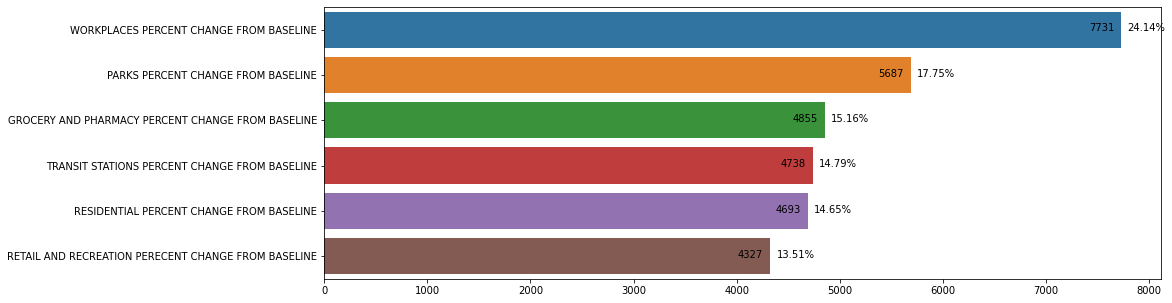

In [50]:
fig, ax1 = plt.subplots(figsize=(15, 5))

graph = sns.barplot(x=gmob['Indicator'].value_counts().values, y=gmob['Indicator'].value_counts().index, ax=ax1)

total = len(gmob['Indicator'])
for p in graph.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 1
    y = p.get_y() + p.get_height() / 2 + 0.3
    graph.annotate(('{:.0f}'.format(p.get_width())), (x, y), ha = 'center', va = 'center', 
                   xytext = (-20, 15), textcoords = 'offset points')
    graph.annotate(percentage, (x, y), ha = 'center', va = 'center', 
                   xytext = (25, 15), textcoords = 'offset points')

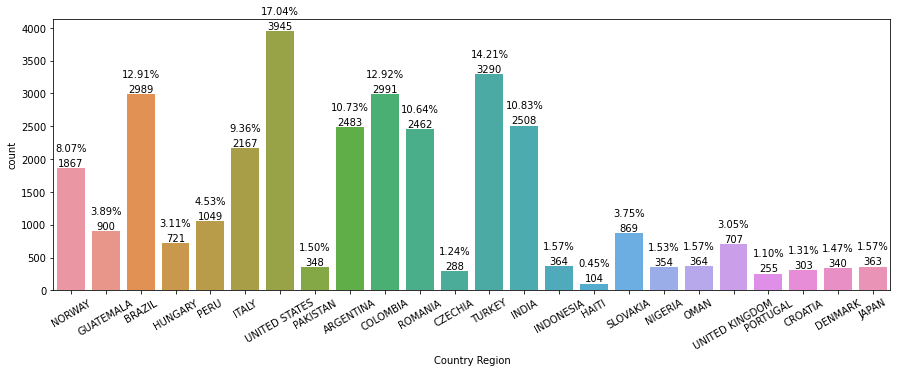

In [44]:
fig, ax1 = plt.subplots(figsize=(15, 5))
graph = sns.countplot(x='Country Region', data=gmob, ax=ax1)
vertical_labelvalue(graph, gmob, 30)

In [111]:
gmob_sr1 = gmob.groupby(['Sub Region 1'], as_index=False).sum()
gmob_sr1 = gmob_sr1.sort_values(['Value'], ascending=0)
gmob_sr2 = gmob.groupby(['Sub Region 2'], as_index=False).sum()
gmob_sr2 = gmob_sr2.sort_values(['Value'], ascending=0)

gmob_sr1

,Sub Region 1,Value
50,NEW JERSEY,24063
73,VESTFOLD OG TELEMARK,20828
30,GILGIT-BALTISTAN,20471
44,M++RE OG ROMSDAL,12817
19,BUENOS AIRES PROVINCE,6750
...,...,...
17,BOYACA,-18069
45,METROPOLITAN MUNICIPALITY OF LIMA,-18652
18,BRA+ÖOV COUNTY,-20212
20,CALDAS,-27647


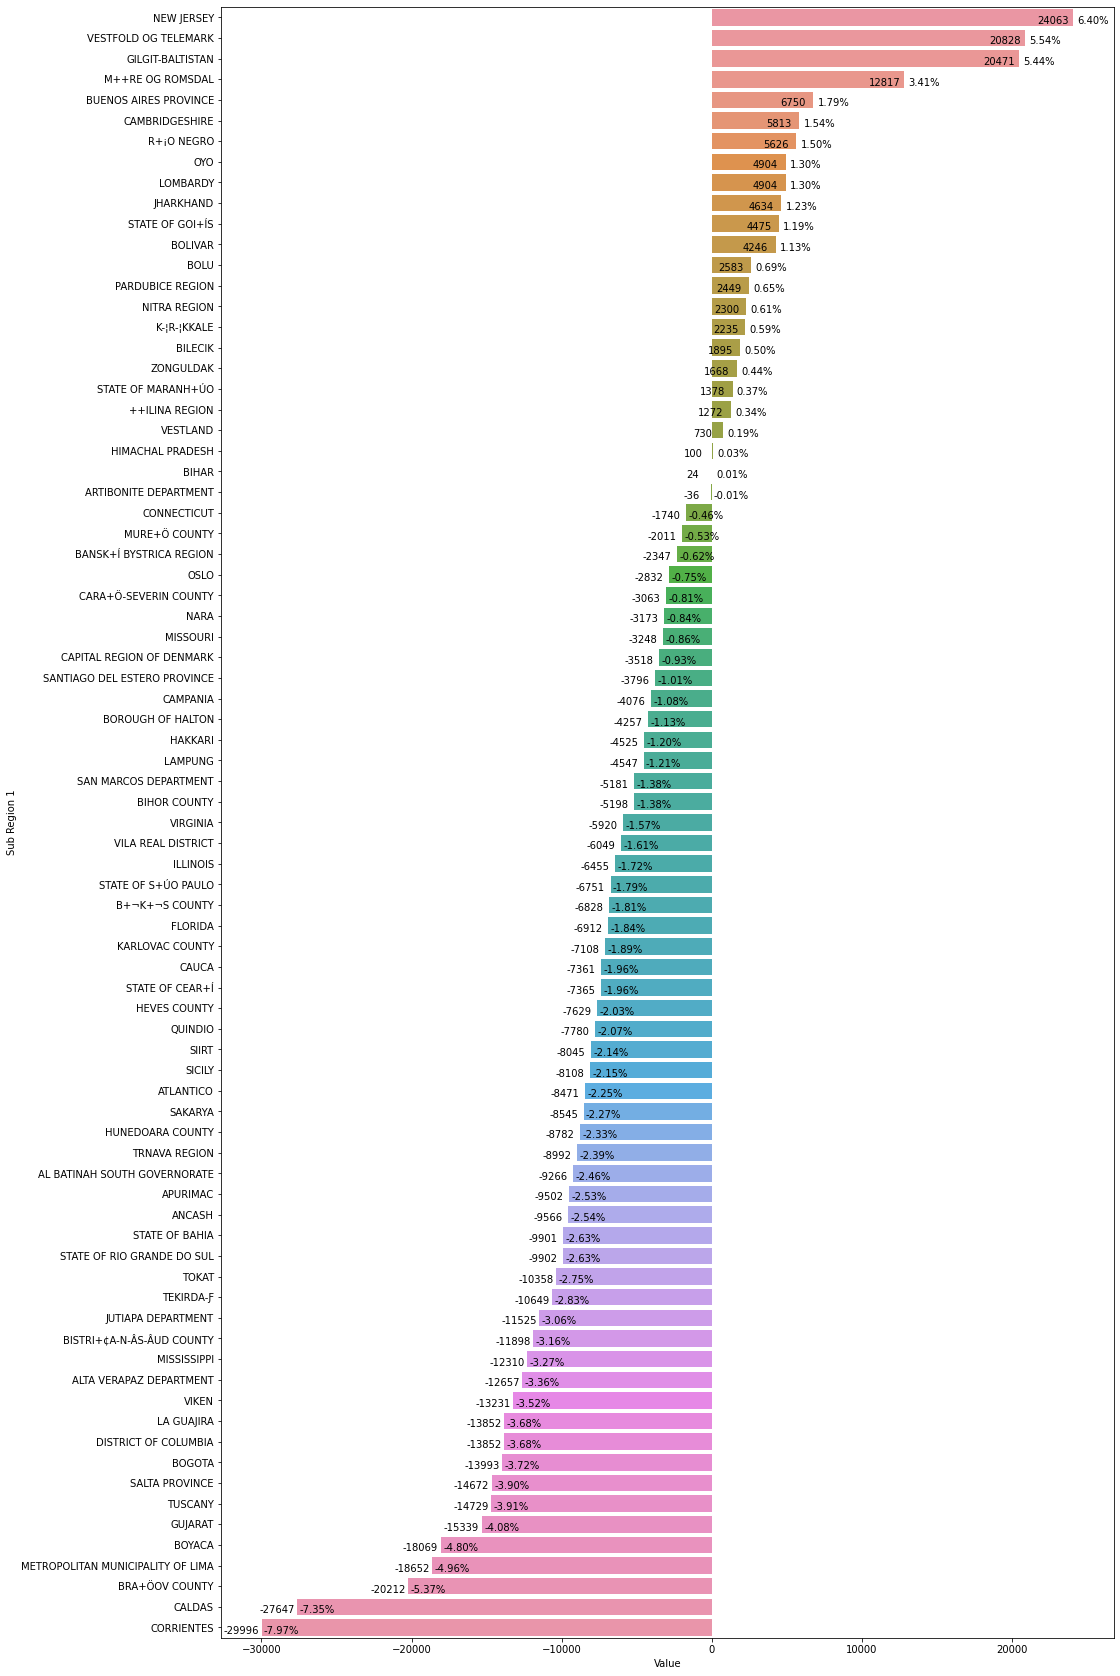

In [105]:
fig, ax = plt.subplots(figsize=(16, 30))
graph = sns.barplot(y='Sub Region 1', x='Value', data=gmob_sr1, ax=ax)
horizontal_labelvalue(gmob_sr1['Sub Region 1'], graph, total=abs(gmob_sr1['Value'].sum()))

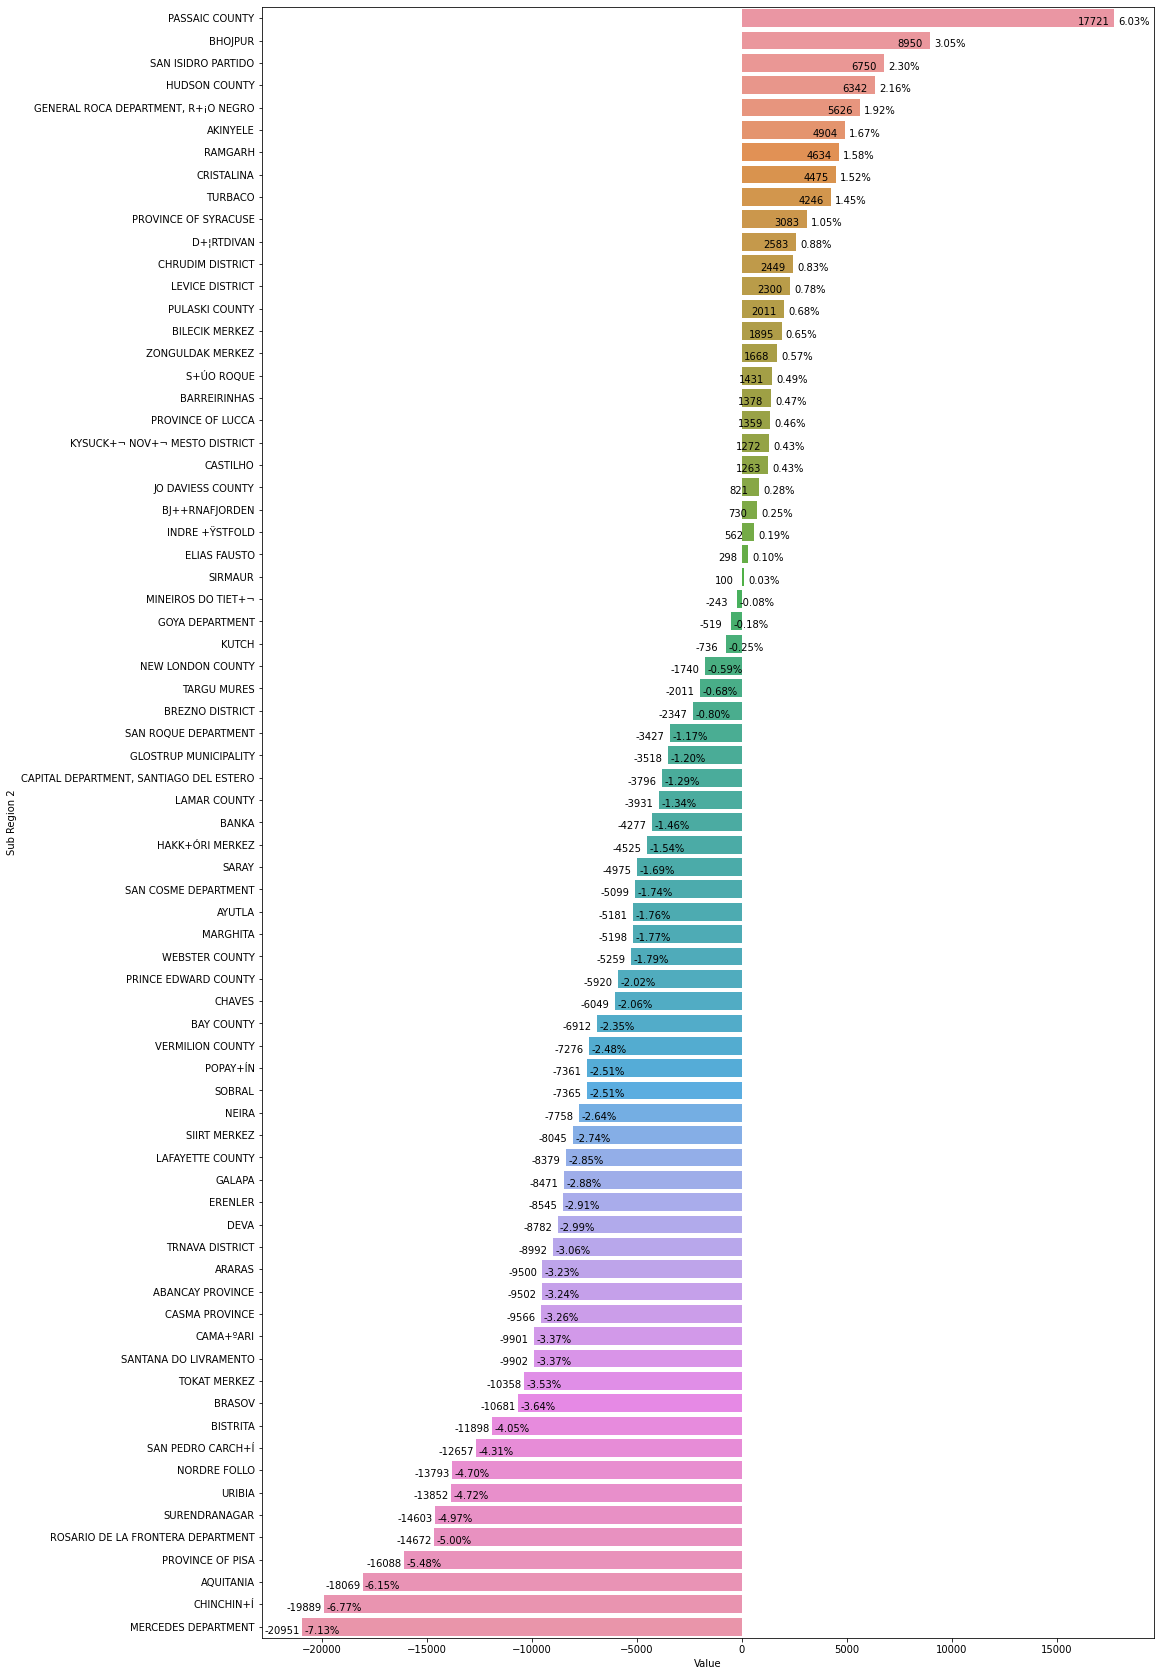

In [113]:
fig, ax = plt.subplots(figsize=(16, 30))
graph = sns.barplot(y='Sub Region 2', x='Value', data=gmob_sr2, ax=ax)
horizontal_labelvalue(gmob_sr2['Sub Region 2'], graph, total=abs(gmob_sr2['Value'].sum()))

In [65]:
pd.set_option('display.max_rows', 10)
gmob['Indicator'].value_counts()

WORKPLACES PERCENT CHANGE FROM BASELINE                7731
PARKS PERCENT CHANGE FROM BASELINE                     5687
GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE      4855
TRANSIT STATIONS PERCENT CHANGE FROM BASELINE          4738
RESIDENTIAL PERCENT CHANGE FROM BASELINE               4693
RETAIL AND RECREATION PERECENT CHANGE FROM BASELINE    4327
Name: Indicator, dtype: int64

In [78]:
workplace_perc = gmob.loc[gmob['Indicator'] == 'WORKPLACES PERCENT CHANGE FROM BASELINE']
parks_perc = gmob.loc[gmob['Indicator'] == 'PARKS PERCENT CHANGE FROM BASELINE']
grocery_pharmacy_perc = gmob.loc[gmob['Indicator'] == 'GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE']
transit_perc = gmob.loc[gmob['Indicator'] == 'TRANSIT STATIONS PERCENT CHANGE FROM BASELINE']
residential_perc = gmob.loc[gmob['Indicator'] == 'RESIDENTIAL PERCENT CHANGE FROM BASELINE']
retail_recreation_perc = gmob.loc[gmob['Indicator'] == 'RETAIL AND RECREATION PERECENT CHANGE FROM BASELINE']

workplace_perc_2 = workplace_perc.groupby('Date')['Value'].sum()
parks_perc_2 = parks_perc.groupby('Date')['Value'].sum()
grocery_pharmacy_perc_2 = grocery_pharmacy_perc.groupby('Date')['Value'].sum()
transit_perc_2 = transit_perc.groupby('Date')['Value'].sum()
residential_perc_2 = residential_perc.groupby('Date')['Value'].sum()
retail_recreation_perc_2 = retail_recreation_perc.groupby('Date')['Value'].sum()

workplace_perc.sort_values(by='Date')

,Value,Date,Country Region,Sub Region 1,Indicator,Sub Region 2
29725,5,2020-02-15,TURKEY,SAKARYA,WORKPLACES PERCENT CHANGE FROM BASELINE,ERENLER
20982,7,2020-02-15,ROMANIA,HUNEDOARA COUNTY,WORKPLACES PERCENT CHANGE FROM BASELINE,DEVA
20278,6,2020-02-15,INDIA,BIHAR,WORKPLACES PERCENT CHANGE FROM BASELINE,NaN
1198,2,2020-02-15,HUNGARY,HEVES COUNTY,WORKPLACES PERCENT CHANGE FROM BASELINE,NaN
23263,6,2020-02-15,TURKEY,SIIRT,WORKPLACES PERCENT CHANGE FROM BASELINE,SIIRT MERKEZ
...,...,...,...,...,...,...
8738,-46,2021-02-21,TURKEY,HAKKARI,WORKPLACES PERCENT CHANGE FROM BASELINE,HAKK+ÓRI MERKEZ
1408,-13,2021-02-21,HUNGARY,HEVES COUNTY,WORKPLACES PERCENT CHANGE FROM BASELINE,NaN
23475,-42,2021-02-21,TURKEY,SIIRT,WORKPLACES PERCENT CHANGE FROM BASELINE,SIIRT MERKEZ
15390,-5,2021-02-21,BRAZIL,STATE OF S+ÚO PAULO,WORKPLACES PERCENT CHANGE FROM BASELINE,CASTILHO


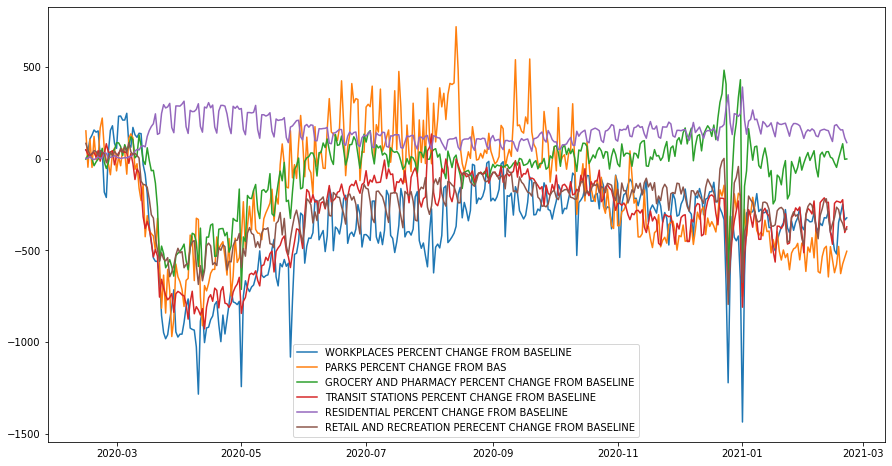

In [96]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.plot(workplace_perc_2.index, workplace_perc_2.values, label='WORKPLACES PERCENT CHANGE FROM BASELINE')
ax.plot(parks_perc_2.index, parks_perc_2.values, label='PARKS PERCENT CHANGE FROM BAS')
ax.plot(grocery_pharmacy_perc_2.index, grocery_pharmacy_perc_2.values, label='GROCERY AND PHARMACY PERCENT CHANGE FROM BASELINE')
ax.plot(transit_perc_2.index, transit_perc_2.values, label='TRANSIT STATIONS PERCENT CHANGE FROM BASELINE')
ax.plot(residential_perc_2.index, residential_perc_2.values, label='RESIDENTIAL PERCENT CHANGE FROM BASELINE')
ax.plot(retail_recreation_perc_2.index, retail_recreation_perc_2.values, label='RETAIL AND RECREATION PERECENT CHANGE FROM BASELINE')

ax.legend(loc='lower center')